### 1. Setting specifications

In [1]:
global graph_opts ///
	title(, justification(left) color(black) span pos(11)) ///
	graphregion(color(white) lc(white) lw(med) la(center)) /// <- remove la(center) for Stata < 15
	ylab(,angle(0) nogrid) xtit(,placement(left) justification(left)) ///
	yscale(noline) xscale(noline) legend(region(lc(none) fc(none)))

### 2. Running ado.file

In [2]:
qui do "https://raw.githubusercontent.com/worldbank/Stata-IE-Visual-Library/develop/Library/Charts/Chart%20of%20marginal%20effect%20with%20results%20table%20(from%20two%20data%20dta)/chartable.ado"

### 3. Uploading data1

In [3]:
use "https://github.com/worldbank/Stata-IE-Visual-Library/raw/develop/Library/Charts/Chart%20of%20marginal%20effect%20with%20results%20table%20(from%20two%20data%20dta)/data.dta", clear

### 4. Keeping only relevant data, creating new ID and a label for a variable

In [4]:
qui keep if (case == 3 | case == 1)
qui bys facilitycode providerid : egen casemax = max(case)
qui bys facilitycode providerid : egen casemin = min(case)
qui keep if (casemax == 3 & casemin == 1)

qui egen fac = group (facilitycode providerid)
label def case 1 "Case 1" 2 "Case 2" 3 "Case 3" 4 "Case 4" , modify

### 5. Creating the graph1 and saving the graph

In [5]:
chartable ///
	correct treat_cxr re_3 re_4 treat_refer med_any med_l_any_1 med_l_any_2 med_l_any_3  med_k_any_9  ///
	[pweight = weight_city] , $graph_opts title("A. Case 1 vs Case 3 in all providers receiving both cases")  rhs(3.case i.city i.type_formal) case0(Case 1 ({it:N} = 407)) case1(Case 3 ({it:N} = 352)) or command(logit)

qui graph save "Fig_4_1.gph" , replace


(0 observations deleted)
(note:  named style med not found in class linewidth, default attributes used)
(note:  linewidth not found in scheme, default attributes used)



### 6. Uploading data2

In [6]:
use "https://github.com/worldbank/Stata-IE-Visual-Library/raw/develop/Library/Charts/Chart%20of%20marginal%20effect%20with%20results%20table%20(from%20two%20data%20dta)/data2.dta", clear

### 7. Creating the labels

In [7]:
label def sp4_spur_1 0 "Ordinary Case 4" 1 "Case 4 w/Sputum Report"
label val sp4_spur_1 sp4_spur_1

### 8. Creating the graph2 and saving the graph

In [8]:
chartable ///
	correct treat_cxr re_3 re_4 treat_refer med_any med_l_any_1 med_l_any_2 med_l_any_3  med_k_any_9  ///
	, $graph_opts title("B. SP4 with and without sputum report in Mumbai MBBS+") rhs(sp4_spur_1) case0(Ordinary ({it:N} = 51)) case1(Report ({it:N} = 50)) or command(logit)
qui graph save "Fig_4_2.gph" , replace


(0 observations deleted)
(note:  named style med not found in class linewidth, default attributes used)
(note:  linewidth not found in scheme, default attributes used)



### 9. Combining the graphs

(note:  named style med not found in class linewidth, default attributes used)
(note:  linewidth not found in scheme, default attributes used)
(note:  named style med not found in class linewidth, default attributes used)
(note:  linewidth not found in scheme, default attributes used)


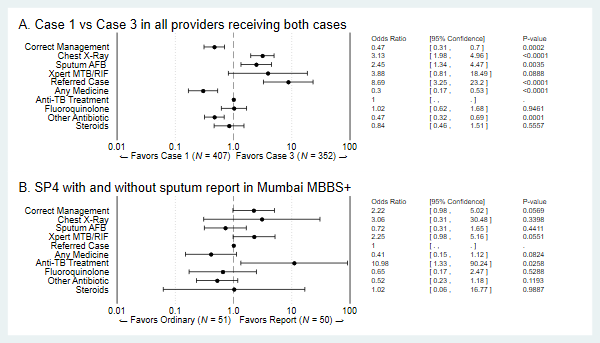

In [9]:
graph combine ///
	"Fig_4_1.gph" ///
	"Fig_4_2.gph" ///
	, $comb_opts xsize(7) c(1)

### 10. Exporting the graph

In [10]:
qui graph export "figure.png" , replace width(2000)